In [1]:
#!pip install tensorflow

In [2]:
#!pip install keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.losses import mean_squared_error, mean_absolute_error

In [4]:
diab = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/pima_indians_diabetes.csv")
diab.head(3)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## Classification

In [5]:
def plot_roc(y,yhat):
    fpr,tpr, thresh = roc_curve(y, yhat)
    auc = roc_auc_score(y, yhat)
    print(f'AUC: {auc}')
    plt.figure(figsize=(3,3))

    plt.title('AUC - ROC Curve', fontsize=15)
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'o--')
    plt.show()

In [6]:
def evaluate_model(y,yhat):
    cm = confusion_matrix(y,yhat)
    plt.figure(figsize=(2,2))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False)
    plt.show()
    print(classification_report(y,yhat))
    plot_roc(y,yhat)

In [7]:
cx = diab.iloc[:,:8]
cy = diab.iloc[:,8]

In [8]:
cX_train,cX_test,cy_train,cy_test = train_test_split(cx,cy,test_size=0.2, random_state=42)
cX_train.shape,cX_test.shape,cy_train.shape,cy_test.shape

((614, 8), (154, 8), (614,), (154,))

### Build the model

In [9]:
cmodel = Sequential()
cmodel.add(Dense(12, input_dim=8, activation='relu' ))
#cmodel.add(Dense(12,  activation='relu' ))
cmodel.add(Dense(8,  activation='relu' ))
cmodel.add(Dense(1,  activation='sigmoid' ))

C:\Users\harik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
cmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = cmodel.fit(cX_train, cy_train, validation_split=0.33, epochs=250, batch_size=10, verbose=0)

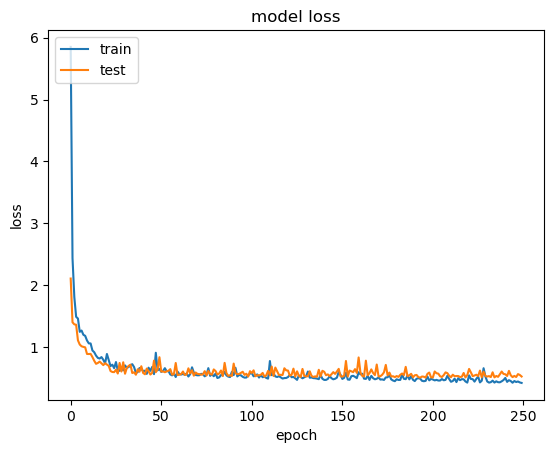

In [12]:
# summarize history for accuracy

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

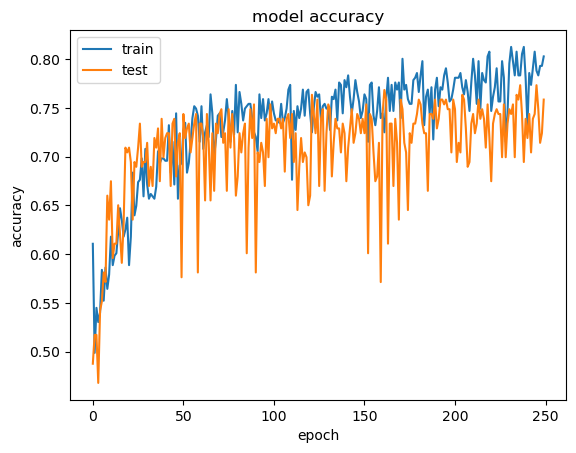

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
chat_test = cmodel.predict(cX_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [15]:
chat_class = (chat_test > 0.35).astype(int).flatten()
chat_class

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [16]:
cy_test.value_counts()

class
0    99
1    55
Name: count, dtype: int64

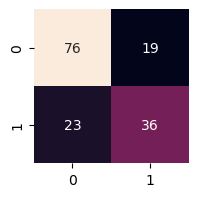

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        95
           1       0.65      0.61      0.63        59

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.72      0.73      0.73       154

AUC: 0.705084745762712


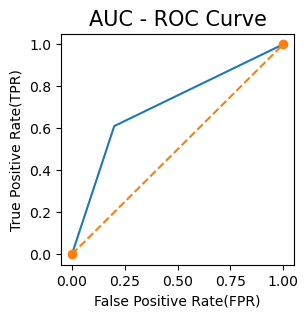

In [17]:
evaluate_model(chat_class,cy_test)

## Regression

In [18]:
ins = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/insurance.csv")
ins.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [19]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
def preprocess_data(df):
    le = LabelEncoder()
    scaler = StandardScaler()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
        elif df[col].dtype in ['int32', 'int64']:
            df[col] =  scaler.fit_transform(df[[col]])
    return df

In [21]:
ins = preprocess_data(ins)

In [22]:
rx = ins.iloc[:,:6]
ry = ins.iloc[:,6]

In [23]:
rx.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,0,27.900,-0.908614,1,3
1,-1.509965,1,33.770,-0.078767,0,2
2,-0.797954,1,33.000,1.580926,0,2
3,-0.441948,1,22.705,-0.908614,0,1
4,-0.513149,1,28.880,-0.908614,0,1


In [24]:
rX_train,rX_test,ry_train,ry_test = train_test_split(rx,ry,test_size=0.2, random_state=42)
rX_train.shape,rX_test.shape,ry_train.shape,ry_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [25]:
rmodel = Sequential()
rmodel.add(Dense(12, input_dim=6, activation='relu' ))
rmodel.add(Dense(12,  activation='relu' ))
rmodel.add(Dense(8,  activation='relu' ))
rmodel.add(Dense(1,  activation='linear' ))

C:\Users\harik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
rmodel.compile(loss='mse', optimizer='adam', metrics=['mae']) 

In [27]:
history = rmodel.fit(rX_train, ry_train, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 326944192.0000 - mae: 13557.8730 - val_loss: 313119840.0000 - val_mae: 12908.9307
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 326600736.0000 - mae: 13545.8936 - val_loss: 312515552.0000 - val_mae: 12886.4961
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 325329088.0000 - mae: 13501.6035 - val_loss: 310466304.0000 - val_mae: 12810.1523
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 321544864.0000 - mae: 13366.0811 - val_loss: 304807488.0000 - val_mae: 12597.1367
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 312377856.0000 - mae: 13033.9902 - val_loss: 292526944.0000 - val_mae: 12122.4492
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 294513600.0000 - mae: 12359.2998 - val_loss: 270374336.0000 - val_mae: 11241.8291
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 264565056.0000 - mae: 11257.6045 - val_loss: 236693120.0000 - val_mae: 10047.9678
Epoch 8/100
7

In [28]:
rmodel.predict()

TypeError: TensorFlowTrainer.predict() missing 1 required positional argument: 'x'